<a href="https://colab.research.google.com/github/Sumitraj05/placement-project-logistic-regression/blob/main/end_to_end_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv('/content/placement.csv')

In [9]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [11]:
df.shape

(100, 4)

In [12]:
# here creating new dataframe from placement.csv except the first column
df = df.iloc[:,1:]

In [13]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [14]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [15]:
import matplotlib.pyplot as plt

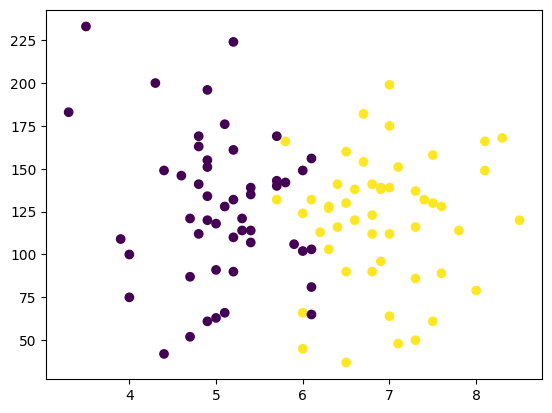

In [16]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [17]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [18]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [19]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [20]:
y.shape

(100,)

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [23]:
X_train

,cgpa,iq
40,4.9,134.0
26,7.0,199.0
95,4.3,200.0
58,8.0,79.0
12,5.4,139.0
...,...,...
71,6.1,132.0
96,4.4,42.0
72,7.3,116.0
79,6.5,90.0


In [24]:
y_train

,placement
40,0
26,1
95,0
58,1
12,0
...,...
71,1
96,0
72,1
79,1


In [25]:
X_test

,cgpa,iq
85,5.8,166.0
63,6.3,128.0
14,6.1,103.0
54,6.4,141.0
19,5.2,132.0
20,6.6,120.0
49,5.4,135.0
8,6.1,156.0
17,3.3,183.0
6,5.7,143.0


In [26]:
y_test

,placement
85,1
63,1
14,0
54,1
19,0
20,1
49,0
8,0
17,0
6,0


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train)

In [30]:
X_train

array([[-0.97223413,  0.30191848],
       [ 0.84349957,  1.89454526],
       [-1.49101519,  1.91904721],
       [ 1.70813467, -1.0456888 ],
       [-0.53991658,  0.42442823],
       [-0.19406254,  0.49793408],
       [ 0.58410905,  0.79195749],
       [ 0.75703606,  0.42442823],
       [-0.02113552, -0.48214394],
       [ 1.27581712,  0.20391068],
       [ 0.41118203,  0.93896919],
       [-0.7128436 ,  2.50709402],
       [-1.83686923, -0.31063028],
       [ 0.23825501, -0.45764199],
       [ 0.84349957, -1.41321805],
       [-0.28052605,  1.15948674],
       [ 1.1028901 , -1.75624536],
       [ 0.32471852, -0.13911663],
       [ 0.67057255,  0.47343213],
       [ 0.75703606,  0.39992628],
       [-0.88577062, -0.75166539],
       [ 1.36228063, -0.80066929],
       [ 0.41118203, -2.07477072],
       [ 0.67057255,  0.03239702],
       [-0.79930711, -1.36421415],
       [-0.62638009, -0.18812053],
       [-0.53991658, -0.35963418],
       [-0.97223413, -1.48672391],
       [ 0.84349957,

In [31]:
X_test = scaler.transform(X_test)

In [32]:
X_test

array([[-0.19406254,  1.08598089],
       [ 0.23825501,  0.15490678],
       [ 0.06532799, -0.45764199],
       [ 0.32471852,  0.47343213],
       [-0.7128436 ,  0.25291458],
       [ 0.49764554, -0.04110883],
       [-0.53991658,  0.32642043],
       [ 0.06532799,  0.84096139],
       [-2.35565029,  1.50251405],
       [-0.28052605,  0.52243603]])

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf = LogisticRegression()

In [35]:
# model training
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='auto')

In [36]:
y_pred = clf.predict(X_test)

In [37]:
y_test

,placement
85,1
63,1
14,0
54,1
19,0
20,1
49,0
8,0
17,0
6,0


In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,y_pred)

0.7

In [40]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

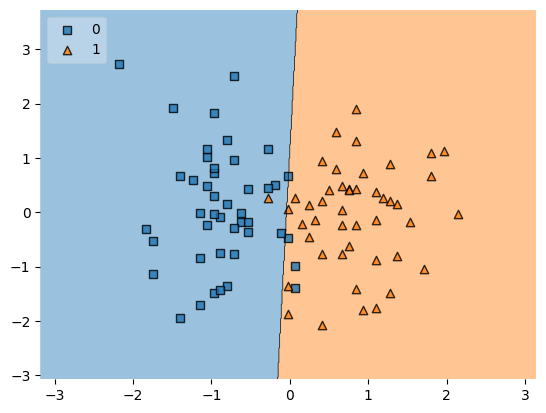

In [41]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [42]:
import pickle

In [43]:
pickle.dump(clf,open('model.pkl','wb'))